## Install packages

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GenomicAlignments")

In [62]:
devtools::install_github("iaaka/visutils")

In [63]:
library(visutils)
library(Seurat)

## Download public dataset from 10x website

In [5]:
loadVisiumFrom10x("https://cf.10xgenomics.com/samples/spatial-exp/1.3.0","Visium_Mouse_Olfactory_Bulb",outdir="data")

load all spots (suppress filtering)

In [38]:
mob = myLoad10X_Spatial('data/Visium_Mouse_Olfactory_Bulb/',filter.matrix = FALSE,ens_id = FALSE)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


### Load spaceranger clusters

In [39]:
cl = read.csv('data/Visium_Mouse_Olfactory_Bulb/analysis/clustering/graphclust/clusters.csv',row.names = 1)
mob$clusters = as.character(cl[colnames(mob),1])
table(mob$clusters,useNA = 'always')


   1    2    3    4    5    6    7 <NA> 
 262  185  172  161  153  131  121 3807 

__plotVisium is the main plot function in visutils. I'll make three plots__ <br>
1. Total UMI across all spots in log scale. Spot size is also proportional to log(UMI). RNA-fingerprint clearly matches H&E image. There are some RNA in out-of-tissue spots
2. Red spots show auto-detected tissue
3. Spaceranger clusters. plotVisium uses categorical coloring since mob$clusters is character

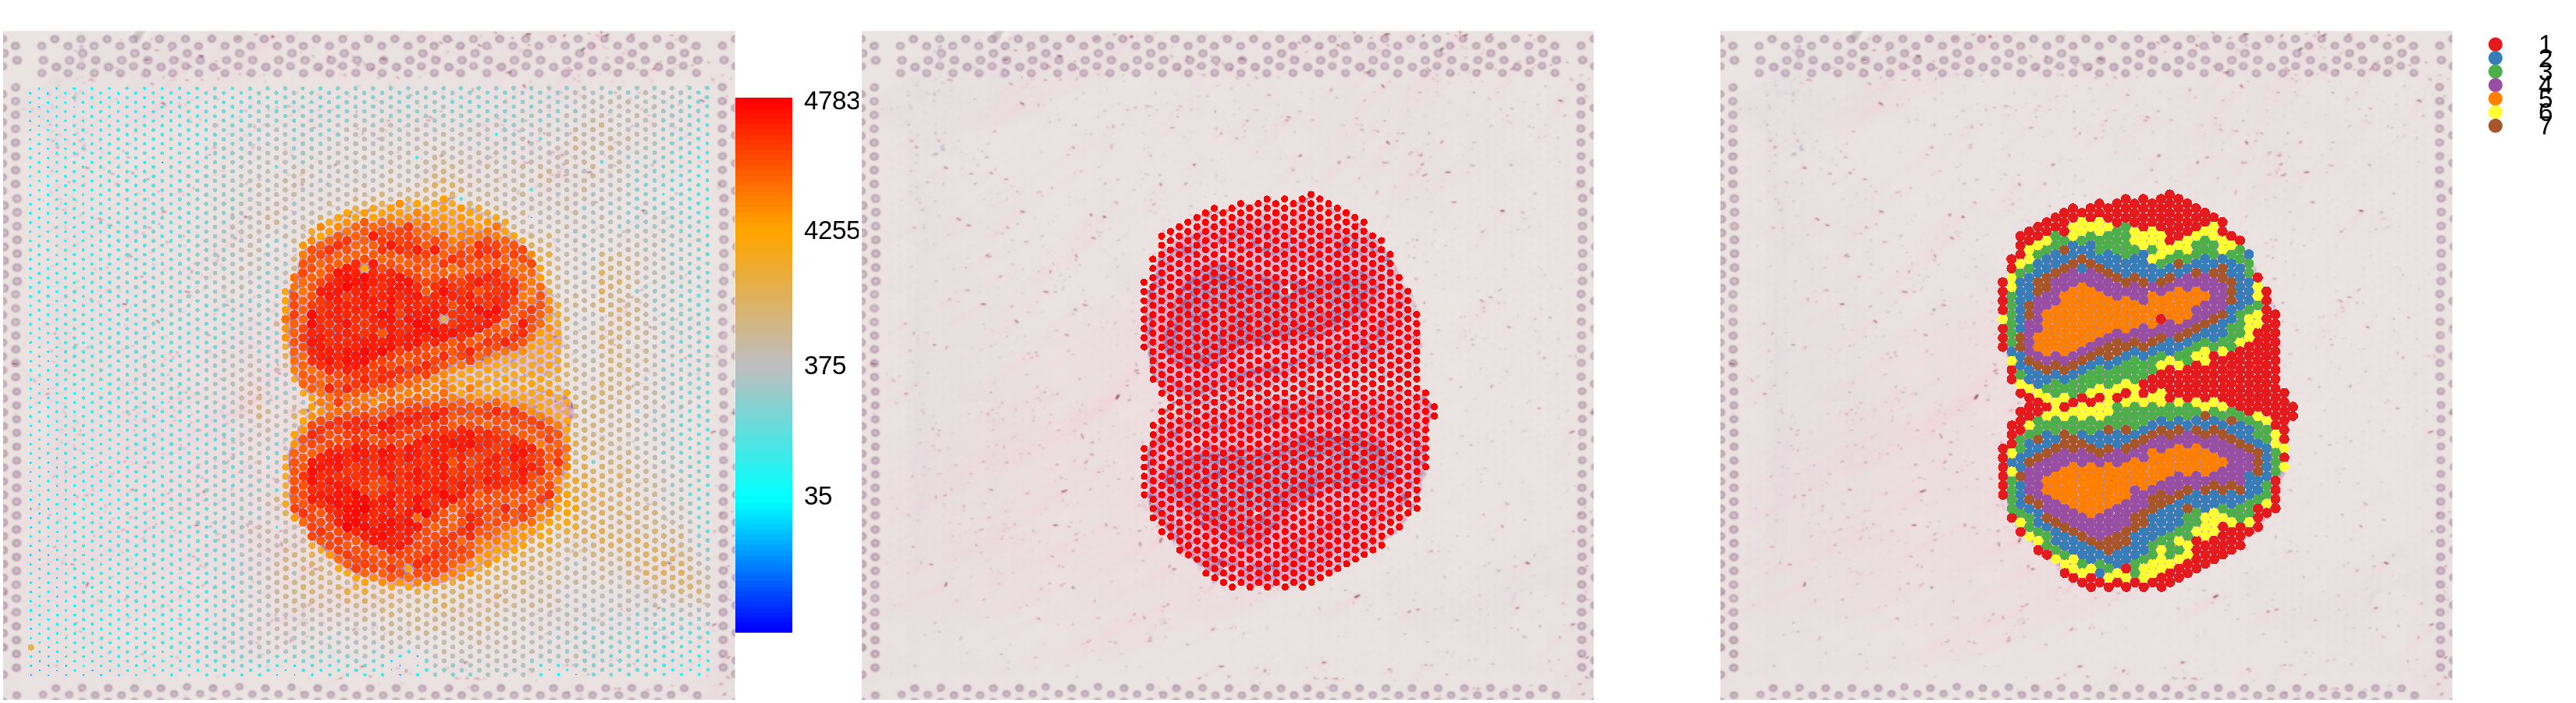

In [9]:
options(repr.plot.width = 11, repr.plot.height = 3, repr.plot.res = 300)
par(mfrow=c(1,3),mar=c(0.1,0.1,1,4),bty='n')
plotVisium(mob,mob$nCount_Spatial,zfun=log1p,cex=scaleTo(log1p(mob$nCount_Spatial)))
plotVisium(mob,'red',cex=mob$is.tissue*0.7)
plotVisium(mob,mob$clusters)

Axis are now shown by defualt, but it can be changes by xaxt/yaxt parameters. xlim/ylim can be used to crop image, spot.filter allows to subset spots to be shown. Image autocroped to visible spots.

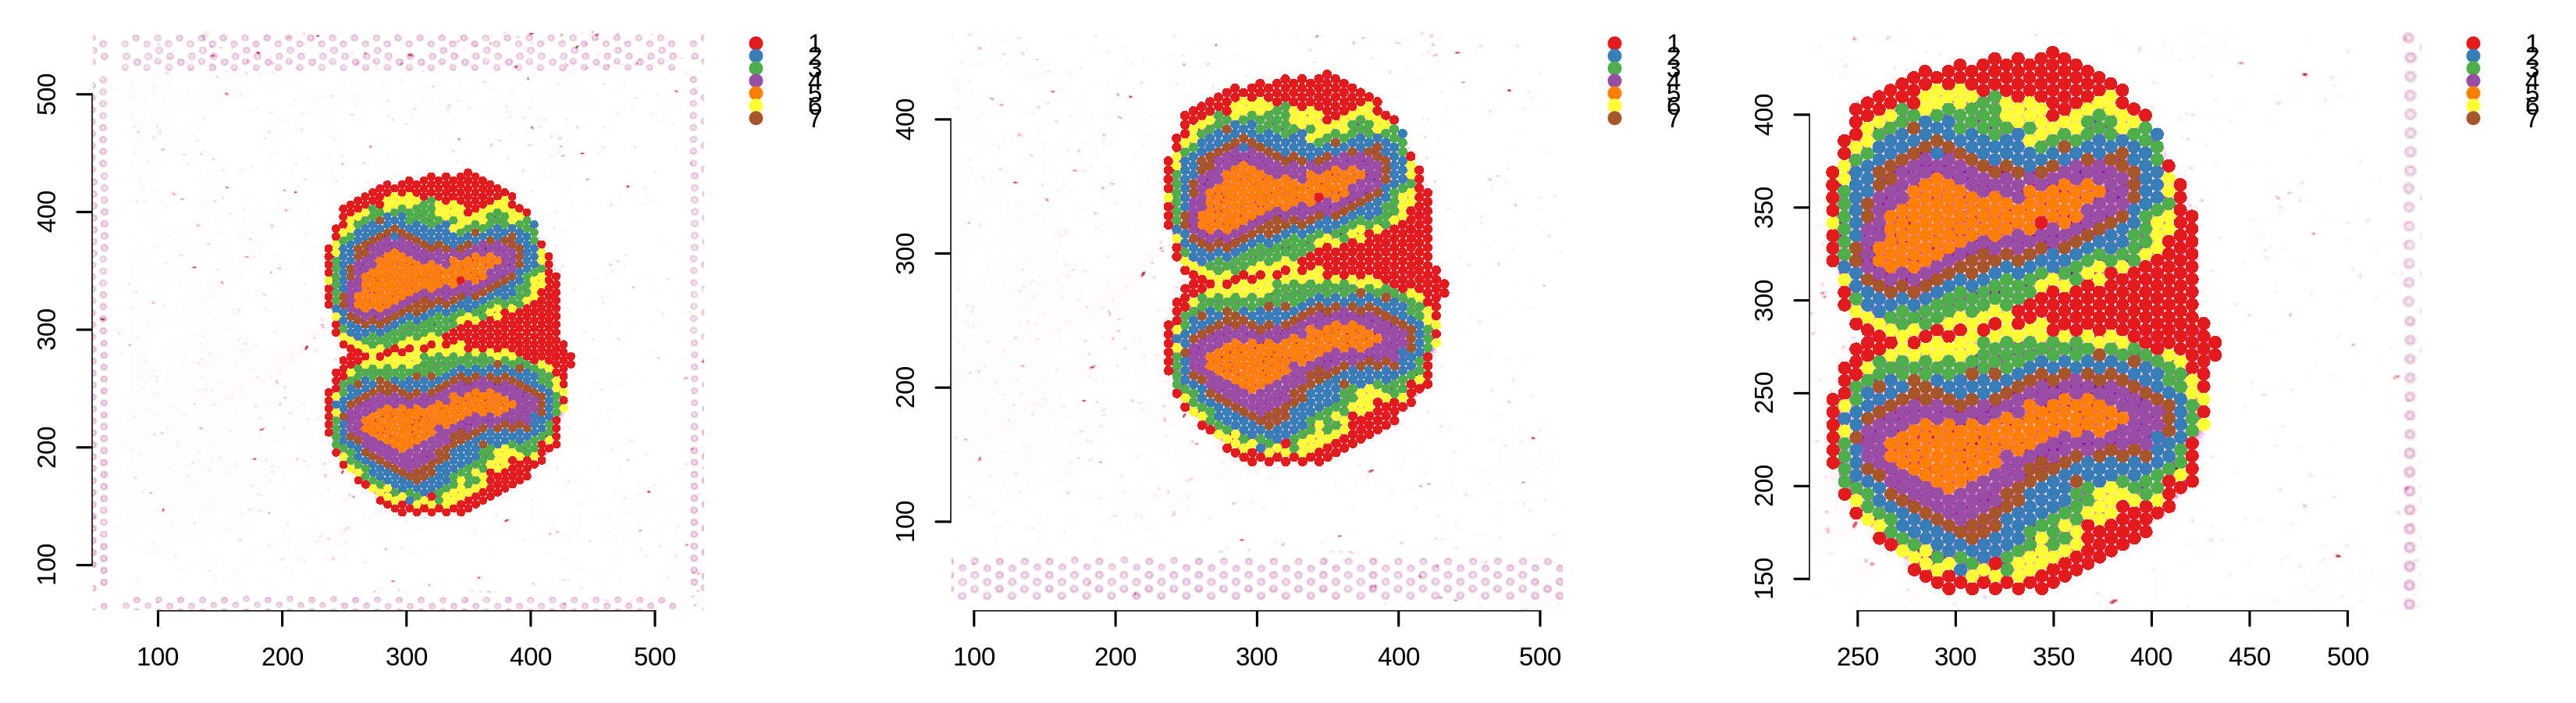

In [13]:
par(mfrow=c(1,3),mar=c(3,3,1,5),bty='n')
plotVisium(mob,mob$clusters,xaxt='s',yaxt='s')
plotVisium(mob,mob$clusters,xaxt='s',yaxt='s',xlim=c(100,500),ylim=c(50,450))
plotVisium(mob,mob$clusters,xaxt='s',yaxt='s',spot.filter = mob$is.tissue==1)

Visium images frequently have low contrast/brightnes, enhanceImage can help. If cex (spot size) is zero, then spots are not shown.

In [10]:
image = mob@images$slice1@image

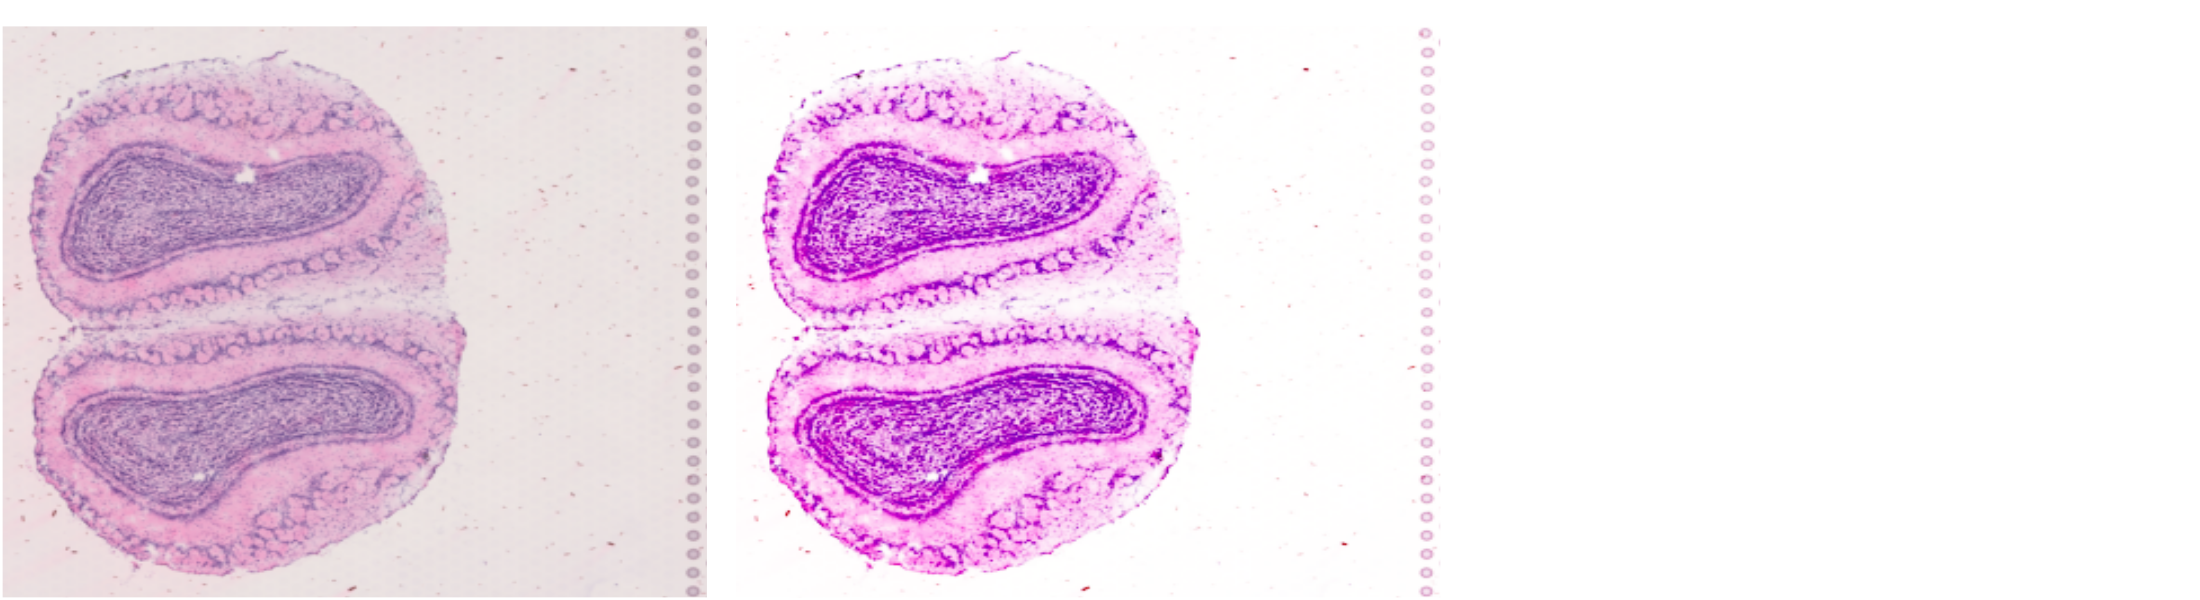

In [56]:
par(mfrow=c(1,3),mar=c(0.1,0.1,1,1),bty='n')
mob@images$slice1@image = image
plotVisium(mob,mob$clusters,cex=0,plot.legend = F,spot.filter = mob$is.tissue==1)
mob@images$slice1@image = enhanceImage(image)
plotVisium(mob,mob$clusters,cex=0,plot.legend = F,spot.filter = mob$is.tissue==1)

H&E image is hardly visible under spots, so sometime it is reasonable to not show it. In this case hex representation can be usefull

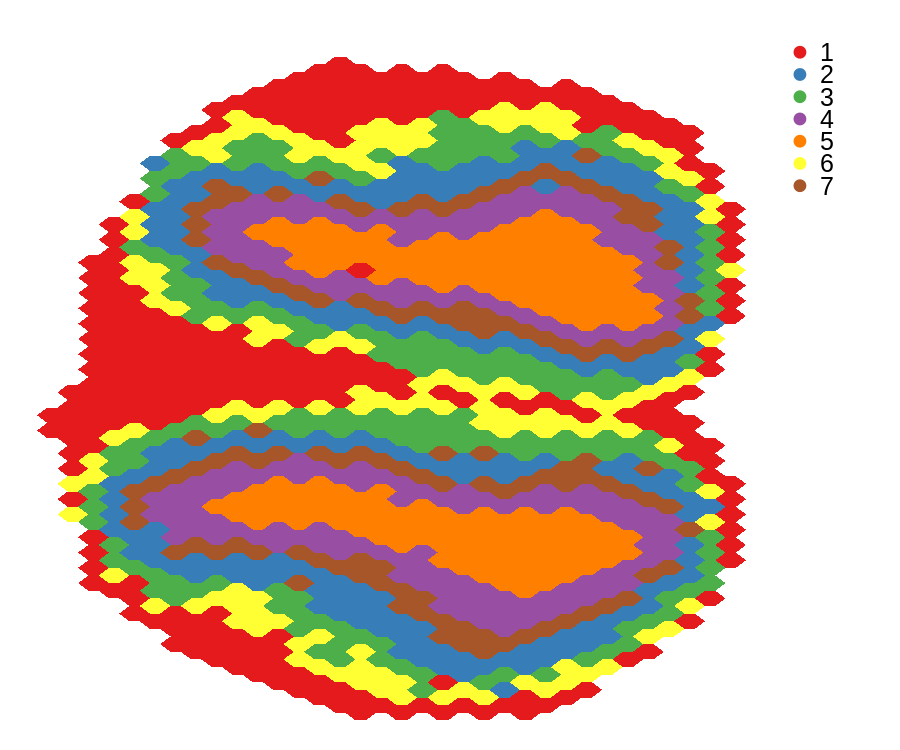

In [19]:
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 150)
par(mar=c(0.1,0.1,1,4),bty='n')
plotVisium(mob,mob$clusters,type='hex',spot.filter = mob$is.tissue==1)

In [42]:
mod.all = mob

In [ ]:
mob = mod.all[,mod.all$is.tissue==1]
mob = NormalizeData(mob)
mob = FindVariableFeatures(mob, selection.method = "vst", nfeatures = 2000)
mob = ScaleData(mob, features = rownames(mob))
mob = RunPCA(mob, features = VariableFeatures(mob))
mob = FindNeighbors(mob, dims = 1:30)
mob = FindClusters(mob, resolution = 0.5)
mob = RunUMAP(mob, dims = 1:30)

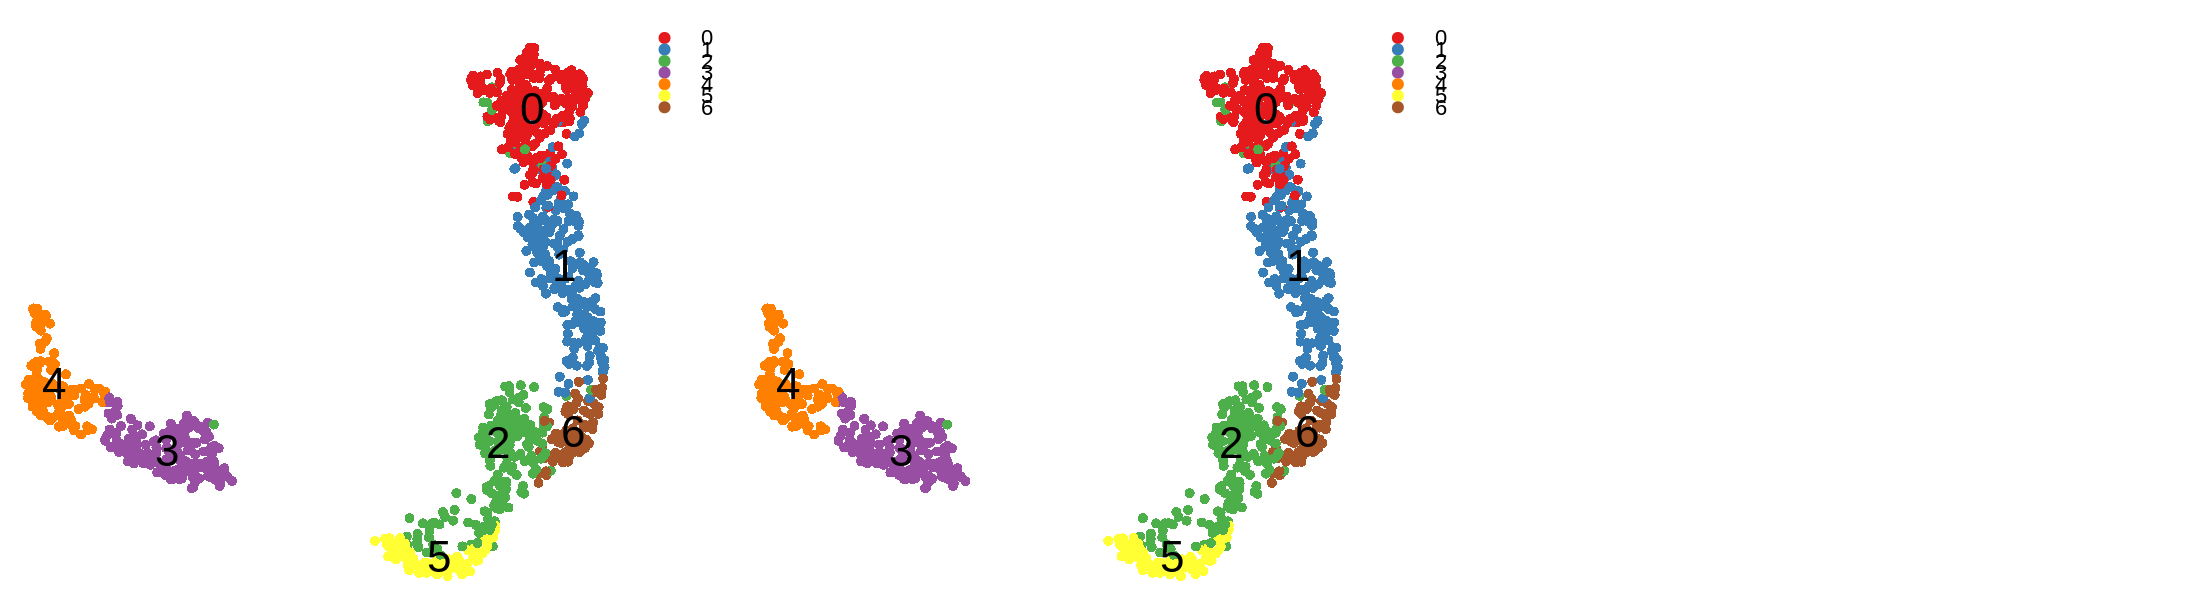

In [55]:
options(repr.plot.width = 11, repr.plot.height = 3, repr.plot.res = 200)
par(mfrow=c(1,3),mar=c(0.1,0.1,1,4),bty='n')
plotVisium(mob,z=mob$seurat_clusters,t='xy',pch=16,label.clusters = TRUE,cluster.lab.cex = 2,xlab='',ylab='')
plotVisium(mob@reductions$umap@cell.embeddings,z=mob$seurat_clusters,t='xy',pch=16,label.clusters = TRUE,cluster.lab.cex = 2,xlab='',ylab='')

In [60]:
vg = VariableFeatures(mob)
(mob@assays$Spatial@scale.data[vg[1],],mob@assays$Spatial@scale.data[vg[2],])

ERROR: Error in plot.as.hm(mob@assays$Spatial@scale.data[vg[1], ], mob@assays$Spatial@scale.data[vg[2], : could not find function "plot.as.hm"


In [ ]:

# pie (using highly expressed genes)
# plot.as.hm